**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: ----Jesús Antonio Serrano Sánchez--------------------
*   MATRÍCULA: ----A00441176-------------------------------------


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [5]:
import pandas as pd
import numpy as np
air_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQMRSmpNOlwsnRJY80jXXpuVY7hGLUg7FhJfhNP9N2G6GlXPDMAPdd_Hr6Tau545o-8kRVSSst_GCkj/pub?output=csv')


print("la forma de los datos es: ",air_df.shape)
print("las columnas de los datos son: ")
print(air_df.columns)
print("los primeros valores son: ")
print(air_df.head)
print("lo súltimos valores son: ")
print(air_df.tail)
print("Tipos de datos son : ",air_df.dtypes)
print("la cantidad de valores faltantes es :")
print(air_df.isna())
print("el  porcentaje de los valores faltantes por columna es de :")
print(air_df.isnull().sum()*100/len(air_df))

la forma de los datos es:  (43800, 6)
las columnas de los datos son: 
Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')
los primeros valores son: 
<bound method NDFrame.head of       Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0      CT3      NO   01/01/2017 0:00    3.5  ug m-3                       R
1      CT3      NO   01/01/2017 1:00    3.6  ug m-3                       R
2      CT3      NO   01/01/2017 2:00    2.2  ug m-3                       R
3      CT3      NO   01/01/2017 3:00    2.1  ug m-3                       R
4      CT3      NO   01/01/2017 4:00    3.3  ug m-3                       R
...    ...     ...               ...    ...     ...                     ...
43795  CT3   PM2.5  31/12/2017 19:00   -2.0  ug m-3                       R
43796  CT3   PM2.5  31/12/2017 20:00    6.0  ug m-3                       R
43797  CT3   PM2.5  31/12/2017 21:00    5.0  ug m-3                  

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [ ]:
from pandas._libs.hashtable import value_count
print("El total de mediciones hechas fue de: ")
print(len(air_df.values))
print()
print("El total de contaminantes del aire analizados fue de")
print(air_df.Species.unique())
print(len(air_df.Species.unique()))
print()
for columna in air_df.columns:
    longitudcolumna=len(air_df[columna].unique())
    if longitudcolumna==1:
      #borrar columna
      air_df = air_df.drop(columna, axis=1)
print()
print(air_df.shape)

El total de mediciones hechas fue de: 
43800

El total de contaminantes del aire analizados fue de
['NO' 'NO2' 'NOX' 'PM10' 'PM2.5']
5


(43800, 4)


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [ ]:
print(air_df.Species.value_counts())
a=air_df['Species'].value_counts()
b=a.sum()
print(b)
if b==len(air_df):
  print('la suma coincide')

NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: Species, dtype: int64
43800
la suma coincide


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [ ]:
air_df.groupby(['Species']).mean()

<ipython-input-7-b69c9a5ecc48>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  air_df.groupby(['Species']).mean()


,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [ ]:
pvt_df=air_df.pivot(index='ReadingDateTime', 'Species', 'value', 'units')

print(pvt_df)

SyntaxError: ignored

6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [10]:
airs_df=air_df.groupby('Series')['values'].describe()
print(airs_df)

KeyError: ignored

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

array([[<Axes: title={'center': 'NO'}>, <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOX'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'PM2.5'}>, <Axes: >]], dtype=object)

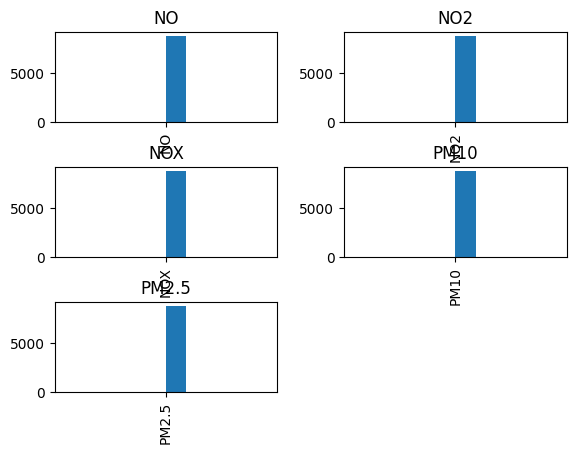

In [ ]:
air_df['Species'].hist(by=air_df['Species'], bins=10)

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [ ]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
#se divide el tiempo de lectura en dos columnas para Date y time
datetime_df.columns = ['Date','Time']
#aqui les asigna nombre
datetime_df
#esto almacena el valor obtenido en datetime_df dataframe
date_df = datetime_df.Date.str.split('/',expand=True)
#aqui se divida la fecha por dia, mes y año y identificando una barra para separar
date_df.columns = ['Day','Month','Year']
#aqui se le asigna nombre a cada subcolumna
date_df
#esto almacena el valor obtenido en date_df dataframe
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
#con esto unimos los dataframe que e crearon para datetime y date junto con air_df
air_df = air_df.set_index(['Month','Day','Time','Species'])
#Aqui se establecen como indices las columnas Month, Day, Time y Species
air_df
#se termina salvando nuestro nuevo datafreme transformado

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [1]:
air_df.unstack()

NameError: ignored

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Las dos instrucciones melt() y pivot() realizan la función opuesta, es decir, la primera convierte las columnas en filas. Las instrucciones stack() y unstack() lo que hacen es apilar una columna en otra y viceversa.
Estas instrucciones nos ayudan a cambiar la estructura del data frame de acuerdo con nuestras necesidades para la manipulaciòn de datos. De eso dependería qué instrucción se requiere.
Si entiendo bien la pregunta por la contraparte de melt() pudiera decirse por analogía serìa unstack, ya que deshace un movimiento que hicimos. Sin embargo creo que no es exacta esa comparación, ya que el efecto es diferente, me parece que más bien se complementan.